## Lecture Housekeeping:

- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

## Neural Networks

#### Learning objectives

   - Define and understand what a neural network is
   - An overview of the basic Neural Network structure
   - Discuss how we evaluate Neural Network models
   - Demonstrate how we build Neural Networks and what considerations we make

## What is a Neural Network

A neural network is a computational model inspired by the way biological neural networks in the human brain work. It consists of interconnected nodes, called neurons or artificial neurons, organized in layers. These layers include an input layer, one or more hidden layers, and an output layer. Neural networks are designed to recognize patterns, interpret complex data, and make predictions by learning from examples.

Basically a subset of Machine Learning that mimics the way biological neurons signal one another.

### Biological metaphor for how Neural Networks work

Imagine you have never seen a cheetah before, and someone shows you pictures of different cheetahs. 

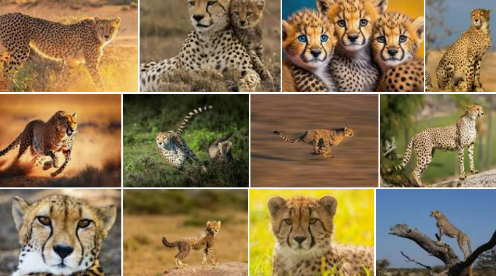

- At first, you will not be able to identify which ones are cheetahs.
 - However, your brain starts to notice certain patterns in the pictures e.g., features (fur, four legs, a tail, spots, etc.)

#### Learning:
Over time, as you see more pictures and get told which ones are indeed cheetahs, your brain learns to recognise patterns more accurately.
#### Decision making:
You get to the point where you see a completely new picture of a cheetah and can decide “that is probably a cheetah”.

#### Conclusion:
The features are essentially the artificial neurons, learning is training the model, and the decision making mirrors how neural network are designed to make predictions/classifications.


## Structure of a Neural Network

This is the general structure of a Neural Network:

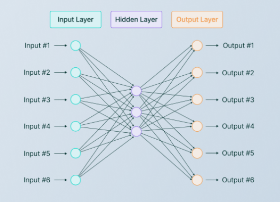

## How Neural Networks are evaluated

#### Step 1: Input layer
Receives input features such as pixel values in an image, an advertising budget amount, etc.

#### Step 2 : Hidden layers
Processes the input data from the neurons of the previous layer and produces an output based on weights and biases.

#### Step 3: Activation function
Applied to the output of each neuron in the hidden layers. It determines whether a nearon should be activated or not.

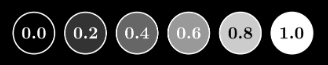

#### Step 4: Output layer
FInal predictions or outputs of the neural network.


## Example

We have a dataset containing wing and weight measurements of 148 birds at a reserve. These birds could belong to one of the following three species, given their measurements:

 - Firewing
 - Shadowhawk
 - Thunderbeaks
 
We have the measurements for a bird: wing length 0.173 and weight 0.087. Unfortunately, it's species was not recorded. We want to use a Neural Network to predict what species this bird could be.

In [5]:
# Import the necessary libraries 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [6]:
# Load data 
data = pd.read_csv('Bird_Data.txt', delimiter = ' ')
data.head()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
0,1,0,0,0.372,0.915
1,1,0,0,0.371,1.160
2,1,0,0,0.469,1.001
3,1,0,0,0.262,1.020
4,1,0,0,0.375,0.950


In [29]:
data.tail()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
143,0,0,1,0.273,0.530
144,0,0,1,0.243,0.334
145,0,0,1,0.194,0.163
146,0,0,1,0.145,0.320
147,0,0,1,0.225,0.325


In [9]:
# Extracting features and labels 
features = data[['Wing', 'Weight']]
labels = data[['Firewing', 'Shadowhawk', 'Thunderbeaks']]

X = features.values 
y = labels.values    


Let us define a neural network model that has an input layer with 2 nodes, a hidden layer with 8 nodes and ReLU activation, and an output layer with 3 nodes and softmax activation. This is a typical setup for a multiclass classification neural network.

In [12]:
# Define the Neural Network model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))

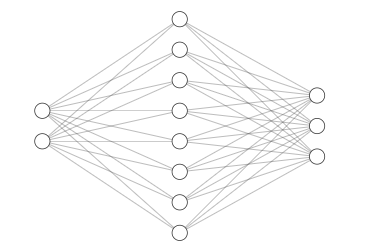

Now we must configure our model. In our case, this involves optimising the categorical cross-entropy loss using a chosen optimizer and tracking the accuracy metric during training. After compilation, the model is ready to be trained on data using the specified loss function, optimizer, and evaluation metric. This step sets the foundation for the learning process.

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Now we train our model. 'epochs' is a hyperparameter that we will set to determine how many times our model will pass through the training set. 

In [21]:
# Train the model
model.fit(X, y, epochs=50)  # Reduced epochs for simplicity

Epoch 1/50
5/5 [==============================] - 0s 10ms/step - loss: 0.7500 - accuracy: 0.8784
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.8784
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7493 - accuracy: 0.8784
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7489 - accuracy: 0.8784
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7485 - accuracy: 0.8784
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.8784
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7478 - accuracy: 0.8784
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.7475 - accuracy: 0.8784
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 0.7471 - accuracy: 0.8784
Epoch 10/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7467 - accuracy: 0.8784
Epoch 11/50
5/5 [====================

In [26]:
# Predict the class for a hawk with wing length 0.173 and weight 0.087
new_data = np.array([[0.173, 0.087]])
predicted_probs = model.predict(new_data)
predicted_probs


1/1 [==============================] - 0s 36ms/step


array([[0.1613432 , 0.4677517 , 0.37090504]], dtype=float32)

In [27]:
predicted_class = np.argmax(predicted_probs)
predicted_class

1

In [18]:
# Map this predicted class index to species label
species_labels = ['Firewing', 'Shadowhawk', 'Thunderbeaks']
predicted_species = species_labels[predicted_class]

In [28]:
print("The predicted species for bird with wing length 0.173 and weight 0.087:", predicted_species)

The predicted species for bird with wing length 0.173 and weight 0.087: Shadowhawk


## Resource

You can learn more about Neural Networks on this website: 
https://www.3blue1brown.com/topics/neural-networks

Or you can visit the 3Blue1Brown YouTube channel: 
https://www.youtube.com/watch?v=aircAruvnKk